In [1]:
# Created 15Mar23
# To create df of schools system sizes for heatmaps of S1-S4
# Second part of this code is for plotting
# See Jupyter notebook: 'sizes_schools_S1-S4'
# check outputs with excel: 'S0-S4 analysis and check'
# previous version of this code: 'system_size_data_hp.py'

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib.ticker import FormatStrFormatter  # to format ticks but doesn't work i think

# Move to path where csv are saved
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs"
path

cwd = os.getcwd()
cwd

os.chdir(path)
cwd    # pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs'

In [2]:
# SCENARIO 1 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF SCHOOLS PER SCENARIO
# Imports csv of scenario I want
s1 = pd.read_csv("Optim_res_unmet_0_inst.csv")  # change to other scenarios

# Separate df to get df of schools only
schools_s1 = s1[s1.Institution != 'Clinic']
# Groups schools by Initial storage and PV size
schools_s1 = schools_s1.groupby(["Initial_storage_size","Initial_PV_size"])
# Counts unique site names to know number of sites per system size combination
schools_s1_cnt = schools_s1.Site_name.nunique()  # returns a series
schools_s1_cnt.head()

# Convert series to df
schools_s1_cnt_df = schools_s1_cnt.to_frame()
# Pivot df so it has a wide-spread form
schools_s1_cnt_df # to show in Jupyter

Site_name
Initial_storage_size Initial_PV_size           
1.0                  0.265                    4
                     0.530                    3
                     0.795                    1
2.0                  0.265                    7
                     0.530                   13
                     0.795                   14
                     1.060                    4
                     1.325                    1
                     1.590                    1
                     2.385                    1
3.0                  0.265                    1
                     0.530                    8
                     0.795                   17
                     1.060                    4
                     1.325                    8
                     1.590                    1
4.0                  0.530                    1
                     0.795                    8
                     1.060                    3
                     1.325                    7
                     1.590                    1
5.0                  0.530                    1
                     0.795                    1
                     1.060                    1
                     1.325                    4
                     1.855                    1
                     2.120                    1
6.0                  0.795                    1
                     1.060                    2
                     1.590                    3
                     1.855                    3
                     2.120                    2
                     2.385                    1
                     2.915                    1
7.0                  0.530                    1
                     1.060                    1
                     1.590                    3
                     1.855                    1
8.0                  1.855                    2
                     2.915                    1
9.0                  1.855                    1
                     2.120                    2
                     2.385                    1
                     3.445                    1
10.0                 2.120                    1
11.0                 1.855                    1
14.0                 2.385                    1
                     3.180                    1

In [3]:
# to check there are 148 schools
schools_s1_cnt_df["Site_name"].sum()  # returns 148

148

In [4]:
# to know schools min and max values (vmin & vmax) 
# or count of system configurations (frequency)
schools_s1_cnt_df["Site_name"].describe().round(2)   
                    # returns: min= 1 (vmin), max= 17 (vmax) 

count    48.00
mean      3.08
std       3.69
min       1.00
25%       1.00
50%       1.00
75%       3.25
max      17.00
Name: Site_name, dtype: float64

In [5]:
schools_s1_hp = schools_s1_cnt_df.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Site_name")
schools_s1_hp # to show in Jupyter

Initial_PV_size,0.265,0.530,0.795,1.060,1.325,1.590,1.855,2.120,2.385,2.915,3.180,3.445
Initial_storage_size,,,,,,,,,,,,
1.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,7.0,13.0,14.0,4.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN
3.0,1.0,8.0,17.0,4.0,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,1.0,8.0,3.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,1.0,1.0,1.0,4.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
6.0,NaN,NaN,1.0,2.0,NaN,3.0,3.0,2.0,1.0,1.0,NaN,NaN
7.0,NaN,1.0,NaN,1.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN,1.0


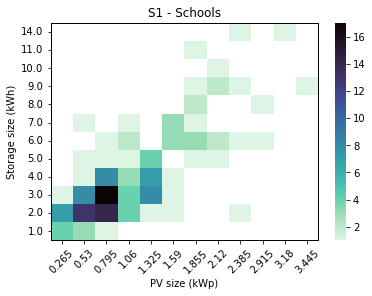

In [6]:
# S1 SCHOOL SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(schools_s1_hp, cmap="mako_r")   # vmin= 1, vmax= 50, annot=True
ax.invert_yaxis()
ax.set_title("S1 - Schools")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [7]:
# SCENARIO 2 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF SCHOOLS PER SCENARIO
# Imports csv of scenario I want
s2 = pd.read_csv("Optim_res_unmet_0.01_inst.csv")  # change to other scenarios

# Separate df to get df of schools only
schools_s2 = s2[s2.Institution != 'Clinic']
# Groups schools by Initial storage and PV size
schools_s2 = schools_s2.groupby(["Initial_storage_size","Initial_PV_size"])
# Counts unique site names to know number of sites per system size combination
schools_s2_cnt = schools_s2.Site_name.nunique()  # returns a series
schools_s2_cnt.head()

# Convert series to df
schools_s2_cnt_df = schools_s2_cnt.to_frame()
# Pivot df so it has a wide-spread form
schools_s2_cnt_df # to show in Jupyter

Site_name
Initial_storage_size Initial_PV_size           
1.0                  0.265                   11
                     0.530                   13
                     0.795                    3
2.0                  0.265                    3
                     0.530                   37
                     0.795                   12
                     1.060                    2
                     1.325                    1
3.0                  0.530                    7
                     0.795                   20
                     1.060                    3
                     1.325                    2
4.0                  0.795                    3
                     1.060                    2
                     1.325                    2
                     1.855                    1
5.0                  0.530                    1
                     1.060                    1
                     1.325                    8
                     1.590                    2
                     1.855                    1
6.0                  1.060                    1
                     1.325                    3
                     1.590                    3
7.0                  1.590                    1
8.0                  1.590                    1
                     1.855                    1
9.0                  1.590                    1
11.0                 2.385                    1
12.0                 2.120                    1

In [8]:
# to check there are 148 schools
schools_s2_cnt_df["Site_name"].sum()  # returns 148

148

In [9]:
# to know schools min and max values (vmin & vmax) 
# or count of system configurations (frequency)
schools_s2_cnt_df["Site_name"].describe().round(2)
                    # returns: min= 1 (vmin), max= 37 (vmax)

count    30.00
mean      4.93
std       7.59
min       1.00
25%       1.00
50%       2.00
75%       3.00
max      37.00
Name: Site_name, dtype: float64

In [10]:
schools_s2_hp = schools_s2_cnt_df.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Site_name")
schools_s2_hp # to show in Jupyter

Initial_PV_size,0.265,0.530,0.795,1.060,1.325,1.590,1.855,2.120,2.385
Initial_storage_size,,,,,,,,,
1.0,11.0,13.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2.0,3.0,37.0,12.0,2.0,1.0,NaN,NaN,NaN,NaN
3.0,NaN,7.0,20.0,3.0,2.0,NaN,NaN,NaN,NaN
4.0,NaN,NaN,3.0,2.0,2.0,NaN,1.0,NaN,NaN
5.0,NaN,1.0,NaN,1.0,8.0,2.0,1.0,NaN,NaN
6.0,NaN,NaN,NaN,1.0,3.0,3.0,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
8.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


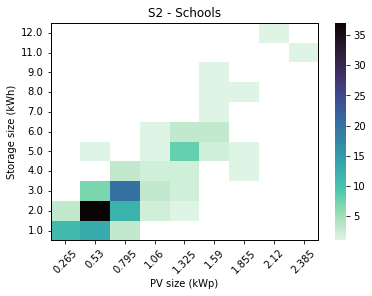

In [11]:
# S2 SCHOOL SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(schools_s2_hp, cmap="mako_r") #  annot=True, vmin=1, vmax=50
ax.invert_yaxis()
ax.set_title("S2 - Schools")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [12]:
# SCENARIO 3 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF SCHOOLS PER SCENARIO
# Imports csv of scenario I want
s3 = pd.read_csv("Optim_res_unmet_0.05_inst.csv")  # change to other scenarios

# Separate df to get df of schools only
schools_s3 = s3[s3.Institution != 'Clinic']  # maybe change name to schools only
# Groups schools by Initial storage and PV size
schools_s3 = schools_s3.groupby(["Initial_storage_size","Initial_PV_size"])  # and here
# Counts unique site names to know number of sites per system size combination
schools_s3_cnt = schools_s3.Site_name.nunique()  # returns a series
schools_s3_cnt.head()

# Convert series to df
schools_s3_cnt_df = schools_s3_cnt.to_frame()
# Pivot df so it has a wide-spread form
schools_s3_cnt_df # to show in Jupyter

Site_name
Initial_storage_size Initial_PV_size           
1.0                  0.265                   28
                     0.530                   15
                     0.795                    3
                     1.060                    1
2.0                  0.265                    4
                     0.530                   48
                     0.795                    9
                     1.060                    1
3.0                  0.530                    4
                     0.795                   11
                     1.060                    2
                     1.325                    3
4.0                  0.795                    1
                     1.060                    6
                     1.325                    1
5.0                  1.060                    4
                     1.325                    2
6.0                  1.325                    1
                     1.590                    2
8.0                  1.325                    1
9.0                  2.120                    1

In [13]:
# to check there are 148 schools
schools_s3_cnt_df["Site_name"].sum()  # returns 148

148

In [14]:
# to know schools min and max values (vmin & vmax) 
# or count of system configurations (frequency)
schools_s3_cnt_df["Site_name"].describe().round(2)
                    # returns: min= 1 (vmin), max= 48 (vmax)

count    21.00
mean      7.05
std      11.39
min       1.00
25%       1.00
50%       3.00
75%       6.00
max      48.00
Name: Site_name, dtype: float64

In [15]:
schools_s3_hp = schools_s3_cnt_df.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Site_name")
schools_s3_hp # to show in Jupyter

Initial_PV_size,0.265,0.530,0.795,1.060,1.325,1.590,2.120
Initial_storage_size,,,,,,,
1.0,28.0,15.0,3.0,1.0,NaN,NaN,NaN
2.0,4.0,48.0,9.0,1.0,NaN,NaN,NaN
3.0,NaN,4.0,11.0,2.0,3.0,NaN,NaN
4.0,NaN,NaN,1.0,6.0,1.0,NaN,NaN
5.0,NaN,NaN,NaN,4.0,2.0,NaN,NaN
6.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN
8.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


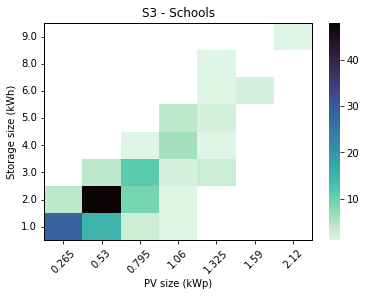

In [16]:
# S3 school SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(schools_s3_hp, cmap="mako_r")  # vmin=1, vmax=50, annot=True
ax.invert_yaxis()
ax.set_title("S3 - Schools")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

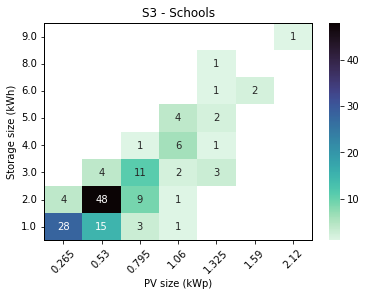

In [17]:
# S3 school SIZES PLOT (Plotting data as it is - with annotations)
ax = sns.heatmap(schools_s3_hp, cmap="mako_r", annot=True)  # vmin=1, vmax=50
ax.invert_yaxis()
ax.set_title("S3 - Schools")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [18]:
# SCENARIO 4 - GENERATING DF TO PLOT HEATMAPS OF SYSTEM SIZES OF SCHOOLS PER SCENARIO
# Imports csv of scenario I want
s4 = pd.read_csv("Optim_res_unmet_0.1_inst.csv")  # change to other scenarios

# Separate df to get df of schools only
schools_s4 = s4[s4.Institution != 'Clinic']  
# Groups schools by Initial storage and PV size
schools_s4 = schools_s4.groupby(["Initial_storage_size","Initial_PV_size"])  
# Counts unique site names to know number of sites per system size combination
schools_s4_cnt = schools_s4.Site_name.nunique()  # returns a series
schools_s4_cnt.head()

# Convert series to df
schools_s4_cnt_df = schools_s4_cnt.to_frame()
# Pivot df so it has a wide-spread form
schools_s4_cnt_df # to show in Jupyter

Site_name
Initial_storage_size Initial_PV_size           
1.0                  0.265                   36
                     0.530                   32
                     0.795                    1
2.0                  0.265                    2
                     0.530                   44
                     0.795                    4
                     1.060                    1
3.0                  0.530                    2
                     0.795                   11
                     1.060                    2
4.0                  0.795                    4
                     1.060                    3
                     1.325                    1
5.0                  1.060                    1
                     1.325                    1
6.0                  1.325                    1
7.0                  1.325                    1
8.0                  1.855                    1

In [19]:
# to check there are 148 schools
schools_s4_cnt_df["Site_name"].sum()  # returns 148

148

In [20]:
# to know schools min and max values (vmin & vmax) 
# or count of system configurations (frequency)
schools_s4_cnt_df["Site_name"].describe().round(2)
                    # returns: min= 1 (vmin), max= 44 (vmax)

count    18.00
mean      8.22
std      13.77
min       1.00
25%       1.00
50%       2.00
75%       4.00
max      44.00
Name: Site_name, dtype: float64

In [21]:
schools_s4_hp = schools_s4_cnt_df.reset_index().pivot(index="Initial_storage_size", columns="Initial_PV_size", values="Site_name")
schools_s4_hp # to show in Jupyter

Initial_PV_size,0.265,0.530,0.795,1.060,1.325,1.855
Initial_storage_size,,,,,,
1.0,36.0,32.0,1.0,NaN,NaN,NaN
2.0,2.0,44.0,4.0,1.0,NaN,NaN
3.0,NaN,2.0,11.0,2.0,NaN,NaN
4.0,NaN,NaN,4.0,3.0,1.0,NaN
5.0,NaN,NaN,NaN,1.0,1.0,NaN
6.0,NaN,NaN,NaN,NaN,1.0,NaN
7.0,NaN,NaN,NaN,NaN,1.0,NaN
8.0,NaN,NaN,NaN,NaN,NaN,1.0


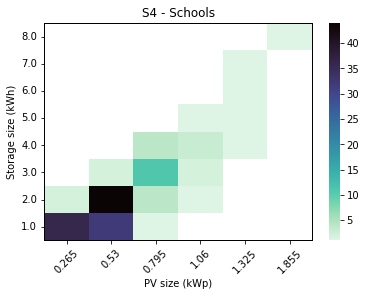

In [22]:
# S4 SCHOOL SIZES PLOT (Plotting data as it is)
ax = sns.heatmap(schools_s4_hp, cmap="mako_r")  # set annot=True, vmin= 1, vmax= 50
ax.invert_yaxis()
ax.set_title("S4 - Schools")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

In [24]:
# Setting style for plotting
sns.set(rc={"figure.dpi":300})
sns.set_style("ticks")
#sns.set_context("paper")  # poster

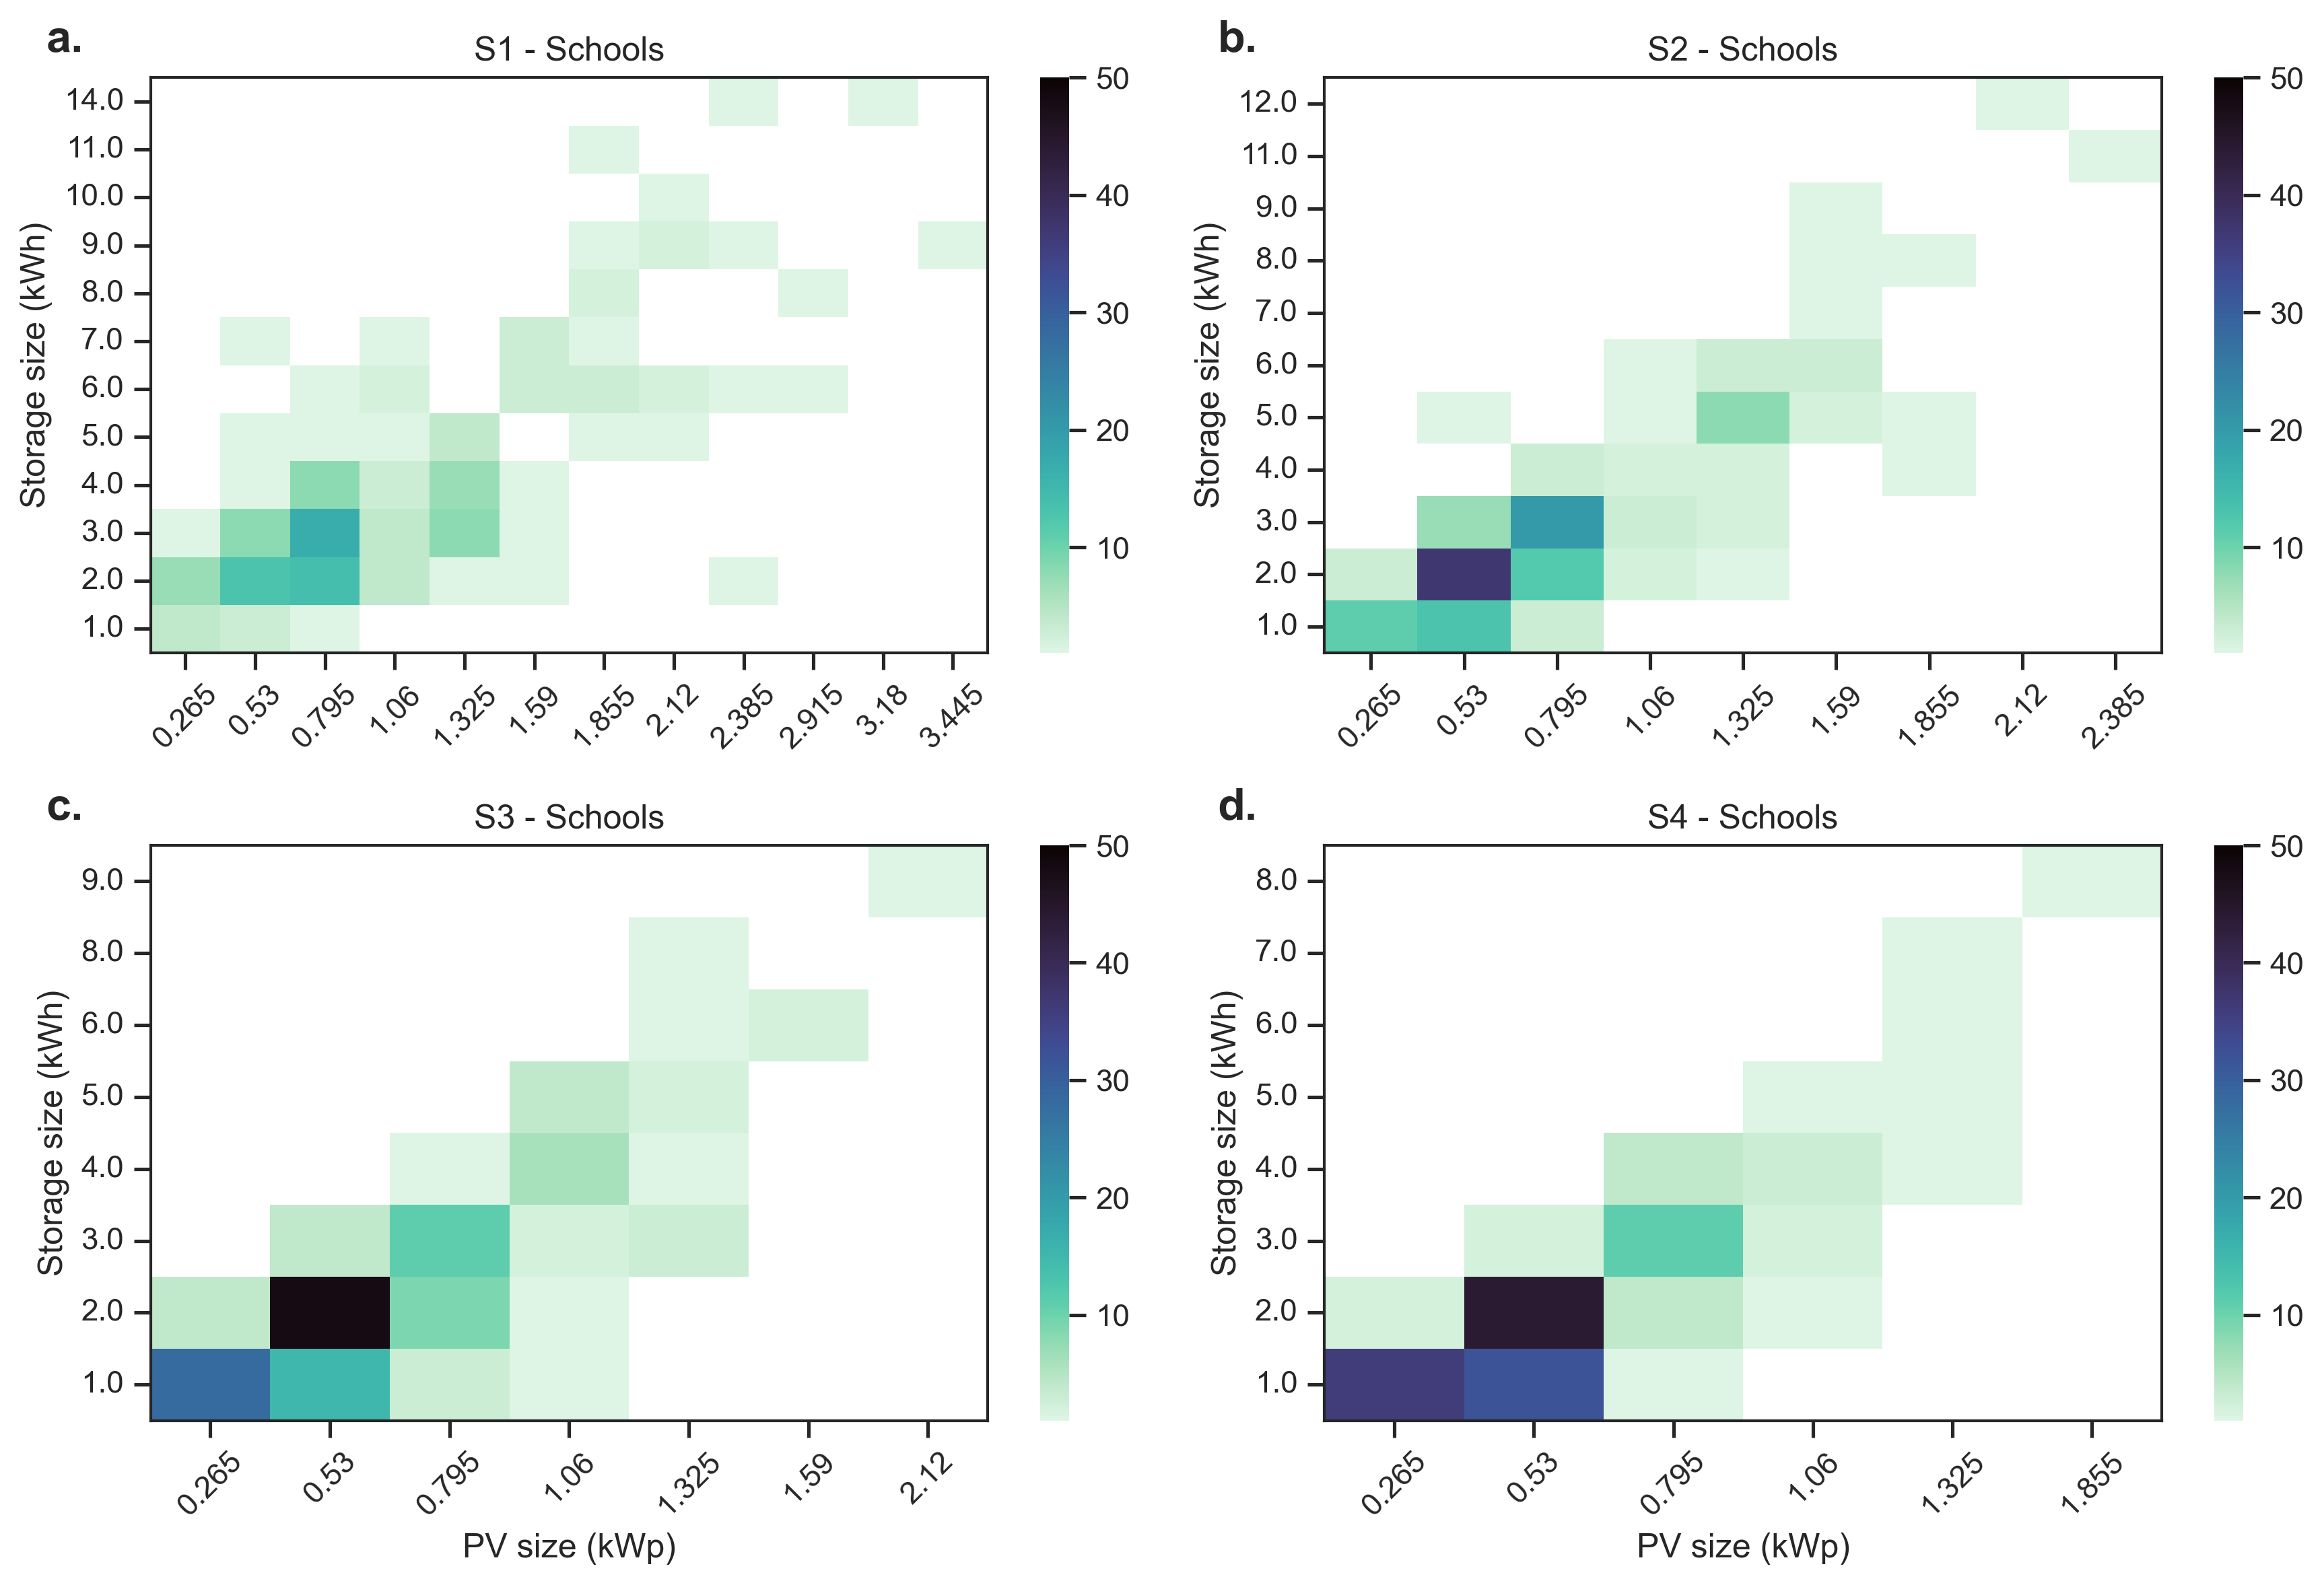

In [25]:
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with data as it is (different axis but same colour scale)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    schools_s1_hp, vmin=1, vmax=50, cmap="mako_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Schools")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
#axis.plot(3.5,5.1, marker="D", color= "black", ms="5")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    schools_s2_hp, vmin=1, vmax=50, cmap="mako_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Schools")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
#axis.plot(3.5,5.1, marker="D", color= "black", ms="5")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    schools_s3_hp, vmin=1, vmax=50, cmap="mako_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Schools")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
#axis.plot(3.5,5.1, marker="D", color= "black", ms="5")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    schools_s4_hp, vmin=1, vmax=50, cmap="mako_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Schools")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
#axis.plot(3.5,5.1, marker="D", color= "black", ms="5")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

In [26]:
# CHANGE DF TO EXTEND X AND Y AXIS AND REINDEX DF TO COMPARE PLOTS S1-S4
# BUT FIRST CHANGE AXIS DEPENDING OF SYSTEM SIZES MAX sizes (all scenarios together)

# to print ranges of axis (storage size - S1 has the largest)
for p in range(1, 15):
    print(p, end=', ')

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 

In [27]:
# to print ranges of axis (PV size - S1 has the largest) with better format
for i in (np.arange(0.265, 3.71, 0.265)).round(3):
    print(i, end=', ')

0.265, 0.53, 0.795, 1.06, 1.325, 1.59, 1.855, 2.12, 2.385, 2.65, 2.915, 3.18, 3.445, 

In [28]:
# CHANGE DF TO EXTEND X AND Y AXIS AND REINDEX DF TO COMPARE PLOTS
# S1
schools_s1_hp_ext = schools_s1_hp.reindex(range(1,15), axis=0) # fill_value=0
schools_s1_hp_ext = schools_s1_hp_ext.reindex((np.arange(0.265, 3.71, 0.265)).round(3), axis=1)
schools_s1_hp_ext

Initial_PV_size,0.265,0.530,0.795,1.060,1.325,1.590,1.855,2.120,2.385,2.650,2.915,3.180,3.445
Initial_storage_size,,,,,,,,,,,,,
1,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.0,13.0,14.0,4.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,1.0,8.0,17.0,4.0,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,8.0,3.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.0,1.0,1.0,4.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,1.0,2.0,NaN,3.0,3.0,2.0,1.0,NaN,1.0,NaN,NaN
7,NaN,1.0,NaN,1.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,1.0


In [29]:
# S2
schools_s2_hp_ext = schools_s2_hp.reindex(range(1,15), axis=0) # fill_value=0
schools_s2_hp_ext = schools_s2_hp_ext.reindex((np.arange(0.265, 3.71, 0.265)).round(3), axis=1)
schools_s2_hp_ext

Initial_PV_size,0.265,0.530,0.795,1.060,1.325,1.590,1.855,2.120,2.385,2.650,2.915,3.180,3.445
Initial_storage_size,,,,,,,,,,,,,
1,11.0,13.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,37.0,12.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,7.0,20.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.0,NaN,1.0,8.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# S3
schools_s3_hp_ext = schools_s3_hp.reindex(range(1,15), axis=0) # fill_value=0
schools_s3_hp_ext = schools_s3_hp_ext.reindex((np.arange(0.265, 3.71, 0.265)).round(3), axis=1)
schools_s3_hp_ext

Initial_PV_size,0.265,0.530,0.795,1.060,1.325,1.590,1.855,2.120,2.385,2.650,2.915,3.180,3.445
Initial_storage_size,,,,,,,,,,,,,
1,28.0,15.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,48.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.0,11.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [31]:
# S4
schools_s4_hp_ext = schools_s4_hp.reindex(range(1,15), axis=0) # fill_value=0
schools_s4_hp_ext = schools_s4_hp_ext.reindex((np.arange(0.265, 3.71, 0.265)).round(3), axis=1)
schools_s4_hp_ext

Initial_PV_size,0.265,0.530,0.795,1.060,1.325,1.590,1.855,2.120,2.385,2.650,2.915,3.180,3.445
Initial_storage_size,,,,,,,,,,,,,
1,36.0,32.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,44.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2.0,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


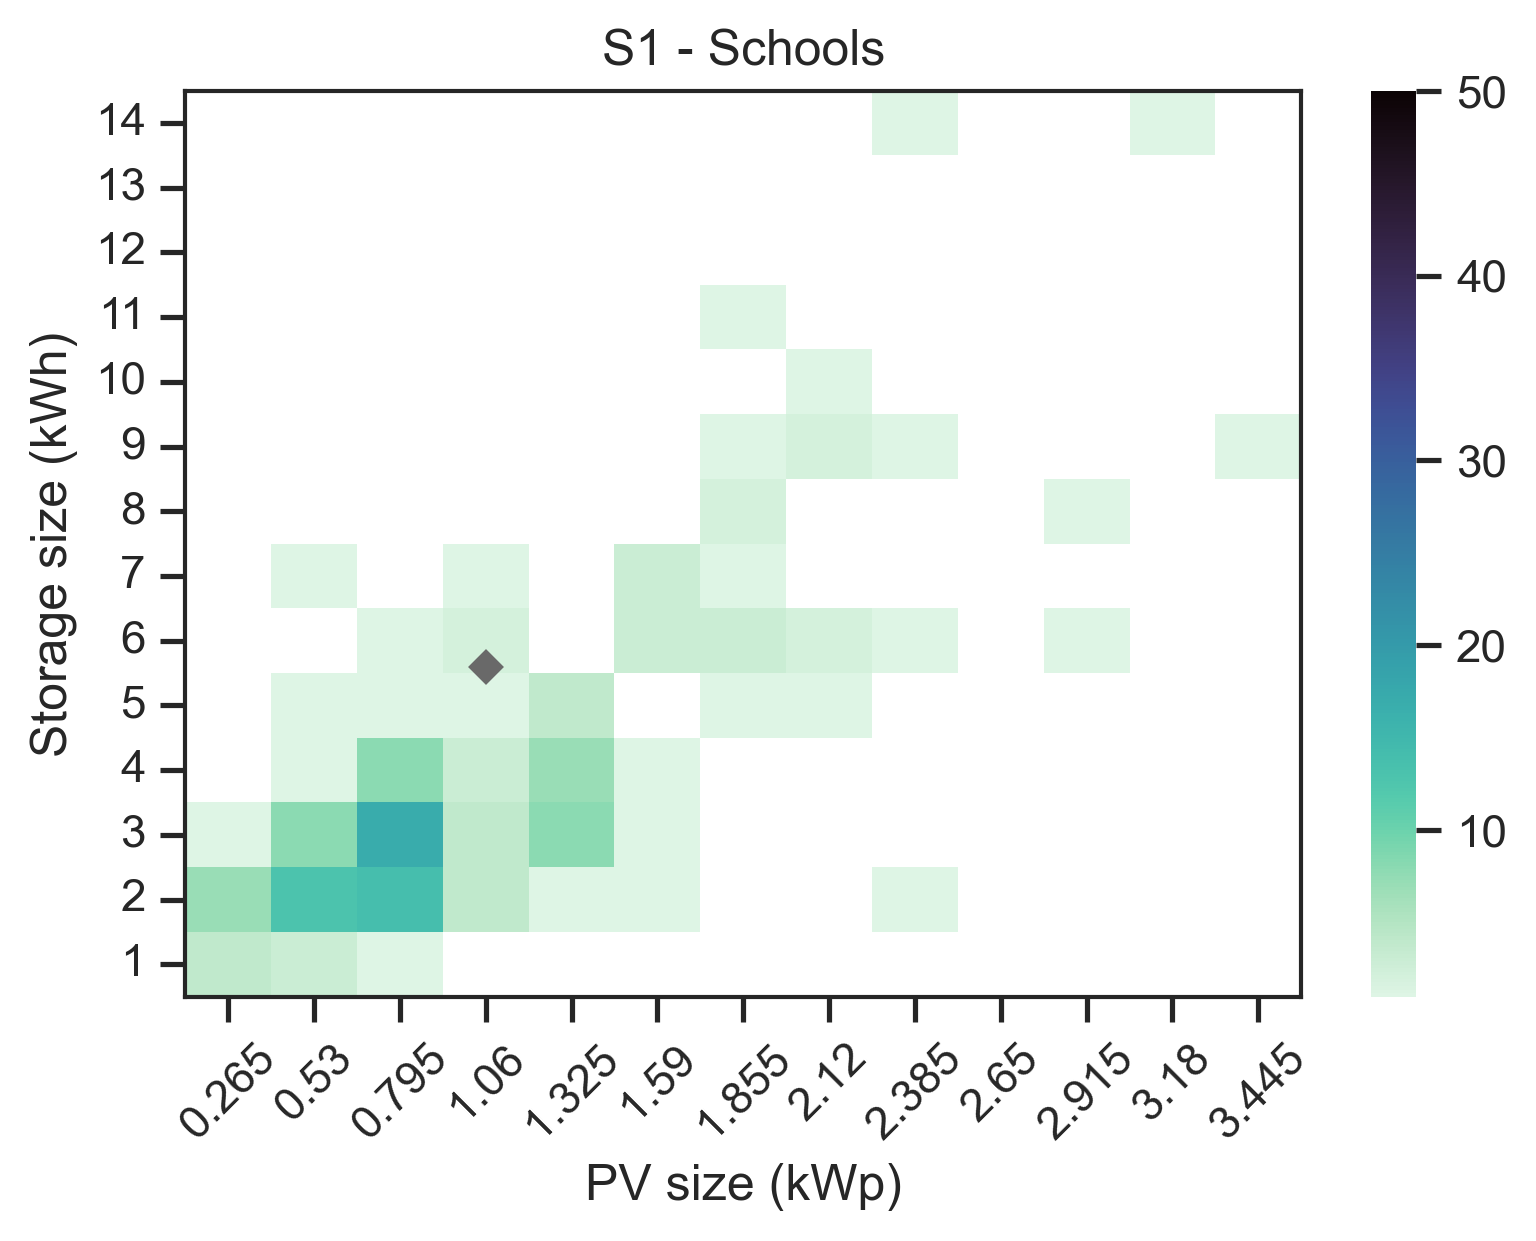

In [32]:
# S1 SCHOOL SIZES PLOT (extending axis and adding Impala with marker)
ax = sns.heatmap(schools_s1_hp_ext, cmap="mako_r", vmin= 1, vmax= 50)
ax.invert_yaxis()
ax.set_title("S1 - Schools")
ax.set_ylabel("Storage size (kWh)")
ax.set_xlabel("PV size (kWp)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# to add Impala as data point (marker by matrix coordinates - not x and y axis values):
ax.plot(3.5,5.1, marker="D", color= "dimgrey", ms="5")  # or "black"
                                                        # change ms for marker size

# Drawing the frame
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# show plot
plt.show()

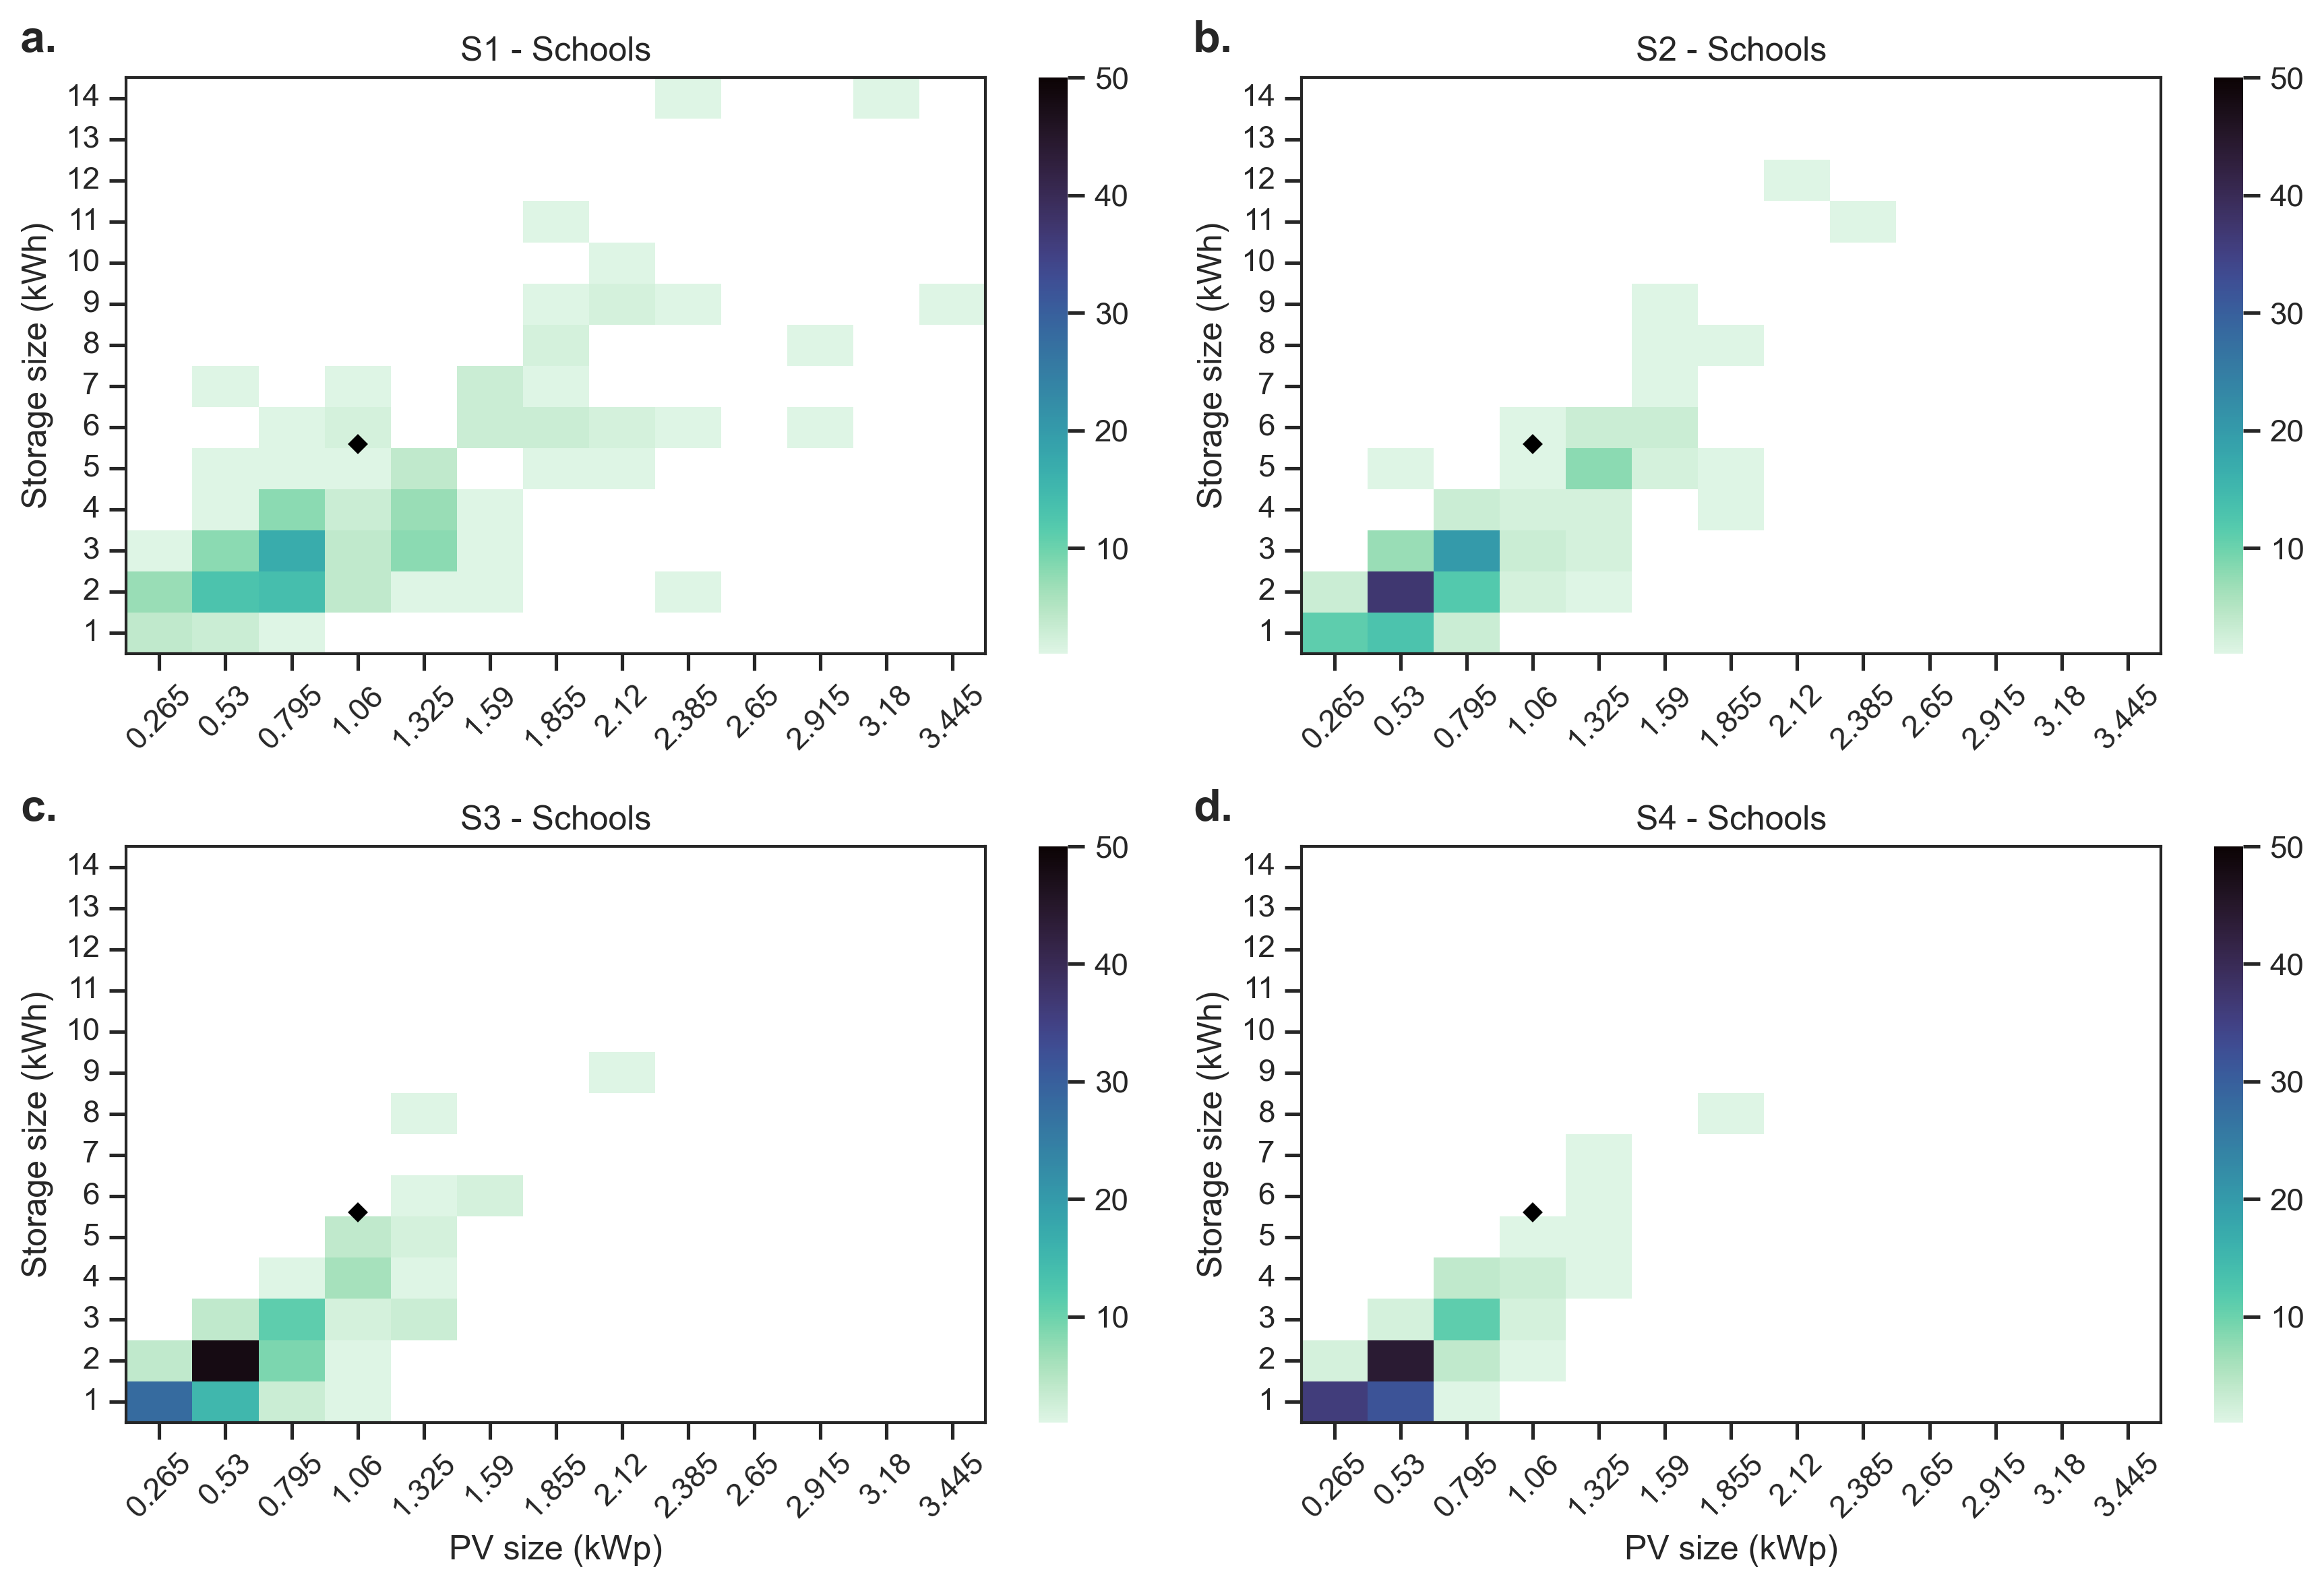

In [33]:
##  BEGINNING OF SUBPLOTS PLOT No. 1  ##
# Subplots of S1-S4 with data as it is (different axis but same colour scale)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # The `figsize` is in inches and can be changed :)

# Python 3.7 etc. version
axis = axes[0, 0]   # top left
sns.heatmap(
    schools_s1_hp_ext, vmin=1, vmax=50, cmap="mako_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S1 - Schools")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "a.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# Repeat but with the other indicies as needed.
axis = axes[0, 1]  # top-right
sns.heatmap(
    schools_s2_hp_ext, vmin=1, vmax=50, cmap="mako_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S2 - Schools")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("") # PV size (kWp)
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "b.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 0]  # bottom-left
sns.heatmap(
    schools_s3_hp_ext, vmin=1, vmax=50, cmap="mako_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S3 - Schools")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "c.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

axis = axes[1, 1]  # bottom-right
sns.heatmap(
    schools_s4_hp_ext, vmin=1, vmax=50, cmap="mako_r",
    ax=axis,
)

# Code for writing titles etc.
axis.invert_yaxis()
axis.set_title("S4 - Schools")
axis.set_ylabel("Storage size (kWh)")
axis.set_xlabel("PV size (kWp)")
axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
axis.set_yticklabels(axis.get_yticklabels(), rotation=0)
axis.plot(3.5,5.1, marker="D", color= "black", ms="4")

# Drawing the frame
for _, spine in axis.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Code for writing the letters, might also be possible to add other labels e.g., "Rhino" near the Rhino column
axis.text(
    -0.08,
    1.1,
    "d.",
    transform=axis.transAxes,
    fontsize=16,
    fontweight="bold",
    va="top",
    ha="right",
)

# plt.savefig(
#     "figure_title.png",
#     transparent=True,
#     dpi=300,
#     bbox_inches="tight",
# )
plt.tight_layout()
plt.show()

##  END OF SUBPLOTS PLOT No. 1  ##

In [ ]:
# change ms number to change marker size
# Another option to add Impala as data point
# ax.text(6.5,6.5, "o")  # or "Impala" instead of "o"

# check outputs with excel: 'S0-S4 analysis and check'
# Go to tab of scenario I want to check, filter by school/clinic, PV and/or storage size to
# see how many sites were found in each optimum system configuration (bin)

# See more on customising heatmap: 
# https://www.python-graph-gallery.com/91-customize-seaborn-heatmap

# Code for making subplots (BW):
#  https://gist.github.com/BenWinchester/b80dacf73507f05162f865fb04845359

# Ultimate guide to Heatmaps:
# https://stackabuse.com/ultimate-guide-to-heatmaps-in-seaborn-with-python/